# 📚 Notebook de Consultas de Datos

Este notebook carga el listado de variables y el dataset procesado para permitir consultas exploratorias y extracción de subconjuntos. Ejecuta la celda siguiente para leer los ficheros (ajusta rutas si es necesario).

In [2]:
# Celda 1: Leer variables y datos
import pandas as pd
variables_path = '../data/raw/PAKDD2010_VariablesList.XLS'
data_path = '../data/raw/PAKDD2010_Modeling_Data.txt'
# Leer listado de variables (XLS)
df_vars = pd.read_excel(variables_path)
colnames = df_vars['Var_Title'].astype(str).tolist()
if len(colnames) > 43:
    colnames[43] = 'MATE_' + colnames[43]
# Leer datos con nombres de columna
df = pd.read_csv(data_path, sep='	', low_memory=False, encoding='latin1', header=None, names=colnames)
print(f"Dimensiones: {df.shape}")
display(df.head())

Dimensiones: (50000, 54)


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [3]:
# Celda 2: Inspeccionar la columna PERSONAL_MONTHLY_INCOME
col = 'MONTHS_IN_THE_JOB'
if col in df.columns:
    uniques = df[col].dropna().astype(str).str.strip().unique()
    print(f"Valores únicos en {col}: {len(uniques)}")
    print(uniques)
    print('Conteo de valores (top 20):')
    display(df[col].value_counts(dropna=False).head(20))
else:
    print(f"La columna {col} no existe en el DataFrame. Revisa los nombres de columna.")

Valores únicos en MONTHS_IN_THE_JOB: 21
['0' '9' '2' '4' '1' '5' '15' '27' '19' '3' '14' '10' '30' '8' '7' '32'
 '18' '26' '35' '12' '6']
Conteo de valores (top 20):


MONTHS_IN_THE_JOB
0     49924
2        18
1        15
3        12
5         6
4         4
6         2
14        2
12        2
7         2
18        2
8         2
9         1
30        1
10        1
27        1
19        1
15        1
32        1
35        1
Name: count, dtype: int64

📌 Observaciones válidas para el análisis: 50000


C:\Users\User\AppData\Local\Temp\ipykernel_29244\2352563389.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='income', data=data, palette='pastel')


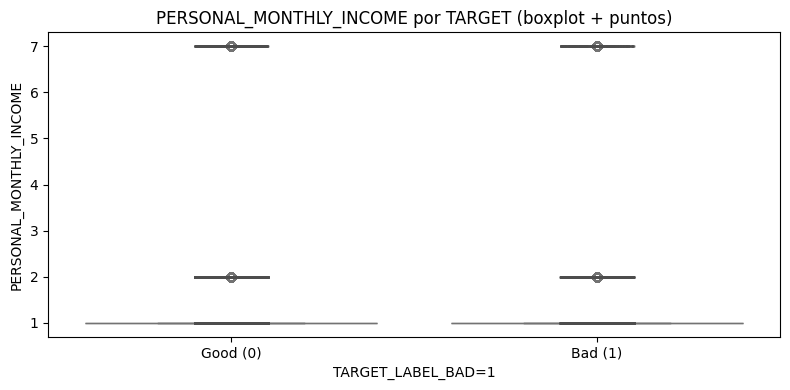

Point-biserial r = 0.0193, p-value = 1.6e-05
📊 Estadísticas por clase:


,target,count,mean,median,std
0,0,36959,1.264374,1.0,0.955866
1,1,13041,1.307798,1.0,1.074256


In [6]:
# Celda: Correlación entre PERSONAL_MONTHLY_INCOME y TARGET_LABEL_BAD=1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

col_income = 'PRODUCT'
target_col = 'TARGET_LABEL_BAD=1'

# Comprobaciones básicas
if 'df' not in globals():
    raise NameError('DataFrame "df" no encontrado. Ejecuta la celda de carga de datos primero.')
if col_income not in df.columns:
    print(f'La columna {col_income} no existe en el DataFrame.')
elif target_col not in df.columns:
    print(f'La columna objetivo {target_col} no existe en el DataFrame.')
else:
    # Convertir a numérico y combinar
    income = pd.to_numeric(df[col_income], errors='coerce')
    target = pd.to_numeric(df[target_col], errors='coerce')
    data = pd.DataFrame({'income': income, 'target': target}).dropna()

    print(f'📌 Observaciones válidas para el análisis: {len(data)}')

    # Boxplot + puntos (stripplot) para visualizar la distribución por clase
    plt.figure(figsize=(8,4))
    sns.boxplot(x='target', y='income', data=data, palette='pastel')
    sns.stripplot(x='target', y='income', data=data, color='0.3', size=2, jitter=True, alpha=0.4)
    plt.xticks([0,1], ['Good (0)', 'Bad (1)'])
    plt.title('PERSONAL_MONTHLY_INCOME por TARGET (boxplot + puntos)')
    plt.xlabel(target_col)
    plt.ylabel('PERSONAL_MONTHLY_INCOME')
    plt.tight_layout()
    plt.show()

    # Calcular correlación punto-biserial si scipy está disponible, sino Pearson
    try:
        from scipy.stats import pointbiserialr
        r, p = pointbiserialr(data['target'], data['income'])
        print(f'Point-biserial r = {r:.4f}, p-value = {p:.3g}')
    except Exception:
        r = data['income'].corr(data['target'])
        print(f'Correlación (Pearson) entre income y target = {r:.4f}')

    # Mostrar medias/medianas por clase
    summary = data.groupby('target')['income'].agg(['count','mean','median','std']).rename_axis('target').reset_index()
    print('📊 Estadísticas por clase:')
    display(summary)
